<a href="https://colab.research.google.com/github/shindechi/Lending-Club-Business-Case-Study/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**

**Note: I have addressed only questions mentioned in the pdf name lending club churn analysis data Exploration Business Case solution Approach**

**Some plots might not get completely printed on the pdf hence providing google colab link.**

----

https://colab.research.google.com/drive/1yOrJ4MfabI5jU5K6oj-ZqBeJD8FeDi5U?usp=sharing

#Business Problem

● This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.

**Data description**

● **RowNumber**— the record (row) number

● **CustomerId**—contains random values

● **Surname**—the surname of a customer

● **CreditScore**—  credit score

● **Geography**— customer’s location

● **Gender**— gender

● **Age**—age of customer

● **Tenure**—refers to the number of years that the customer has been a client of the bank.

● **Balance**—people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

● **NumOfProducts**— number of products that a customer has purchased through the bank.

● **HasCrCard**—denotes whether or not a customer has a credit card.

● **IsActiveMember**—active customers

● **EstimatedSalary**—people with lower salaries are more likely to leave the bank compared to those with higher salaries.

● **Exited**—whether or not the customer left the bank.

● **Complain**—customer has complaint or not.

● **Satisfaction Score**—Score provided by the customer for their complaint resolution.

● **Card Type**—type of card hold by the customer.

● **Points Earned**—the points earned by the customer for using credit card.


In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the lending club data

!gdown https://drive.google.com/file/d/1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W/view

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W/view
To: /content/view
85.9kB [00:00, 3.43MB/s]


In [ ]:
# Assuming 'df' is your DataFrame

df = pd.read_csv("/content/Bank-Records.csv")

#Overview of head and tail combined of the lending club dataframe

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
# Get a concise summary of the DataFrame

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
#Check the null values

print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool


In [ ]:
# Number of columns

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
# Check the shape of the DataFrame

df.shape

(10000, 18)

In [ ]:
#Check the dimensions of the DataFrame

df.ndim

2

In [ ]:
#Check duplicated rows
df.duplicated().sum()

0

 **Insights*

---

The dataset is 2 dimensional with 10000 enteries and 18 descriptions.
With no duplicate values and no null values.

**1. Descriptive Statistics**

Basic Statistics: Calculate mean, median, and mode for numerical columns like CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.

In [ ]:
# Summary statistics for numerical columns

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


# *Insights*

---

**1. CreditScore:**
- The average credit score is 650.53.
- The median credit score is 652.00, indicating that half of the customers have a credit score below 652 and half have a credit score above 652.
- The minimum credit score is 350 and the maximum is 850.

**2. Age:**
- The average age is 38.92 years.
- The median age is 37.00 years, indicating that half of the customers are below 37 years old and half are above 37 years old.
- The minimum age is 18 and the maximum is 92.

**3. Balance:**
- The average balance is 76485.89.
- The median balance is 97198.54, indicating that half of the customers have a balance below 97198.54 and half have a balance above 97198.54.
- The minimum balance is 0 and the maximum is 250898.09.

**4. NumOfProducts:**
- The average number of products is 1.53.
- The median number of products is 1.00, indicating that half of the customers have less than 1 product and half have more than 1 product.
- The minimum number of products is 1 and the maximum is 4.

**5. EstimatedSalary:**
- The average estimated salary is 100090.24.
- The median estimated salary is 100193.91, indicating that half of the customers have a salary below 100193.91 and half have a salary above 100193.91.
- The minimum estimated salary is 11.58 and the maximum is 199992.48.

**6. Points Earned:**
- The average points earned is 1175.74.
- The median points earned is 1277.00, indicating that half of the customers have earned less than 1277 points and half have earned more than 1277 points.
- The minimum points earned is 0 and the maximum is 7644.00.

**7. Cardtype:**
- The most frequent card type is "Diamond".

In [ ]:
# Uniques values of each columns

df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [ ]:
# Checking the value counts of the column.

for i in df.columns:
  print("*The value counts in",i, "column are :")
  print(df[i].value_counts())
  print("-"*70)

*The value counts in RowNumber column are :
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
----------------------------------------------------------------------
*The value counts in CustomerId column are :
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
----------------------------------------------------------------------
*The value counts in Surname column are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
----------------------------------------------------------------------
*The value counts in CreditScore column are :
CreditScore
850    

# **Insights*

---

**1. Geography:**
- Most customers are from France (5014), followed by Spain (2496) and Germany (1564).
- The bank has a relatively small customer base in the UK (414).

**2. Gender:**
- There are slightly more male customers (5457) than female customers (4543).

**3. HasCrCard:**
- Majority of the customers (7055) have a credit card, while 2945 do not.

**4. IsActiveMember:**
- A significant portion of customers (3967) are not active members, while 6033 are active.

**5. Complain:**
- Most customers (8533) have not complained, while 1467 have complained.

**6. Card Type:**
- The most popular card type is Diamond (4648), followed by Platinum (3453) and Gold (1909).

**7. Exited:**
- The majority of customers (7963) have not exited the bank, while 2037 have exited.



#Graphical analysis

In [ ]:
cat_col = ["Card Type","Geography", "Gender",'Tenure','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited', 'Complain','Satisfaction Score']


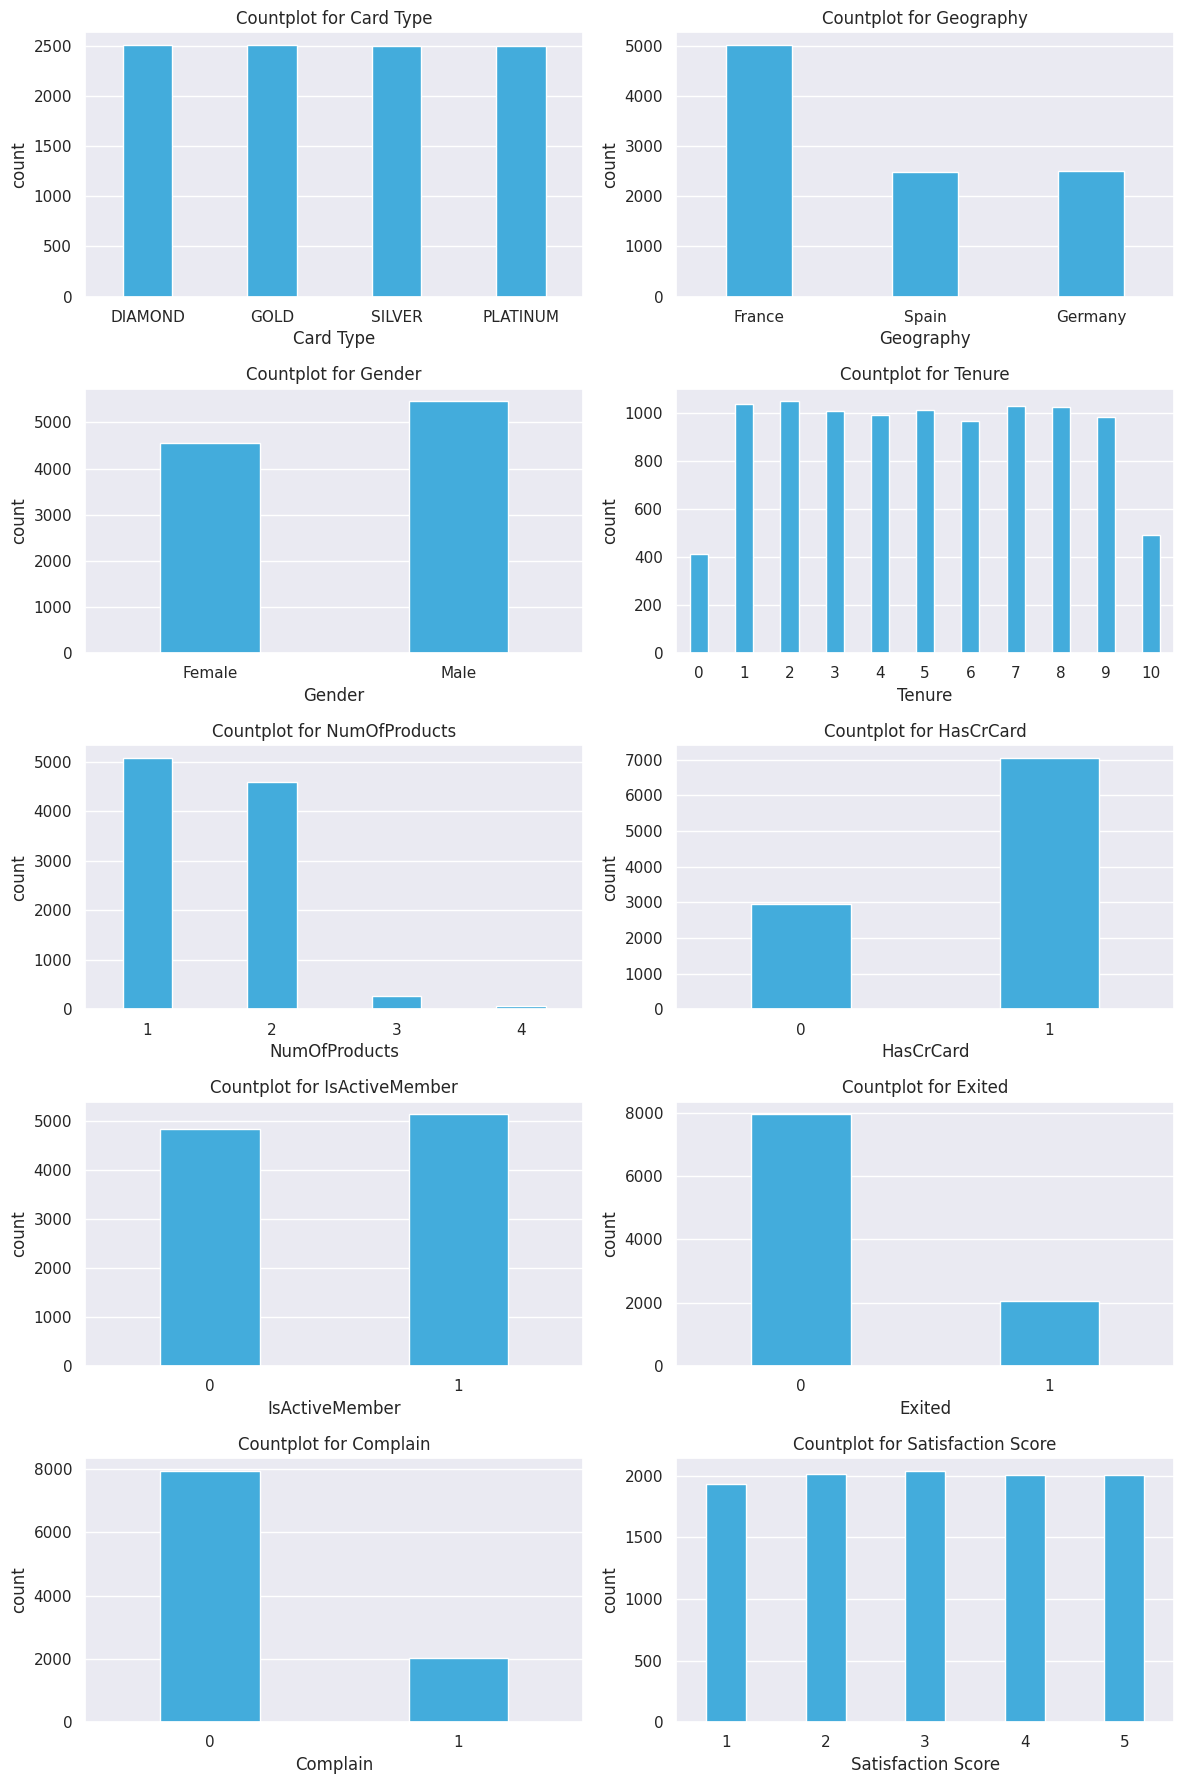

In [ ]:
# countplot on categorical variable

plt.figure(figsize=(12, 18))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=column, data=df, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

# *Insights*
----
**1. Card Type:**
- Most customers have Platinum cards, followed by Gold and Silver cards.

**2. Geography:**
- Majority of customers are from France, followed by Spain and Germany.

**3. Gender:**
- There are slightly more female customers than male customers.

**4. Tenure:**
- Most customers have been with the bank for less than 5 years.

**5. Number of Products:**
- Majority of customers have 1 or 2 products with the bank.

**6. Has Credit Card:**
- More customers have a credit card than those who don't.

**7. Is Active Member:**
- Majority of customers are not active members.

**8. Exited:**
- Most customers have not exited the bank.

**9. Complain:**
- Majority of customers have not complained.

**10. Satisfaction Score:**
- Most customers have a satisfaction score of 2.

Overall, these countplots provide a quick and easy way to visualize the distribution of categorical variables in the dataset. This information can be useful for understanding the characteristics of the customers and identifying potential trends or patterns.

**Distribution Analysis: Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.**

In [ ]:
# Function for histogram & boxplot on numerical columns

def hist_box(column):
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.set(style="darkgrid")

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], color="#29B6F6")
    plt.title(f'Boxplot for {column}')

    tabular_data = df[column].describe().reset_index()
    tabular_data.columns = ['Statistic', 'Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()

,Statistic,Value
0,count,10000.000000
1,mean,650.528800
2,std,96.653299
3,min,350.000000
4,25%,584.000000
5,50%,652.000000
6,75%,718.000000
7,max,850.000000


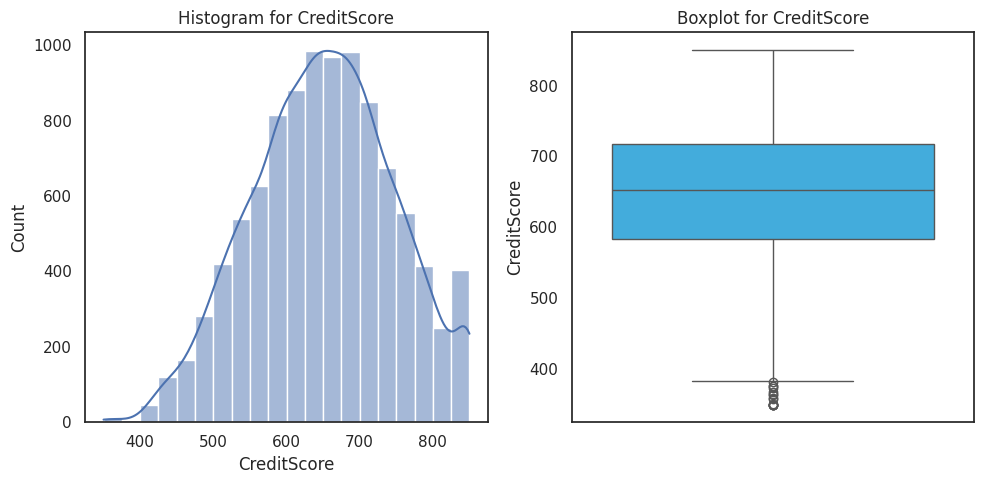

,Statistic,Value
0,count,10000.000000
1,mean,38.921800
2,std,10.487806
3,min,18.000000
4,25%,32.000000
5,50%,37.000000
6,75%,44.000000
7,max,92.000000


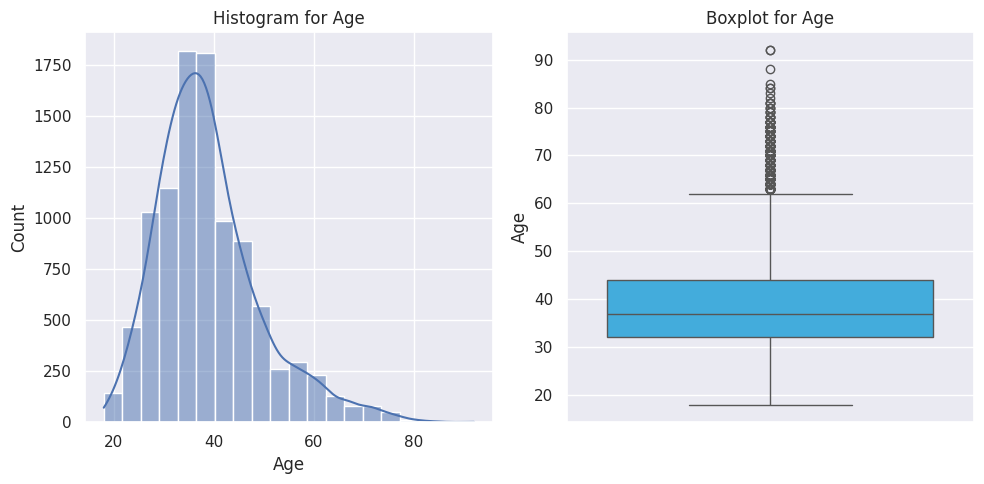

,Statistic,Value
0,count,10000.000000
1,mean,76485.889288
2,std,62397.405202
3,min,0.000000
4,25%,0.000000
5,50%,97198.540000
6,75%,127644.240000
7,max,250898.090000


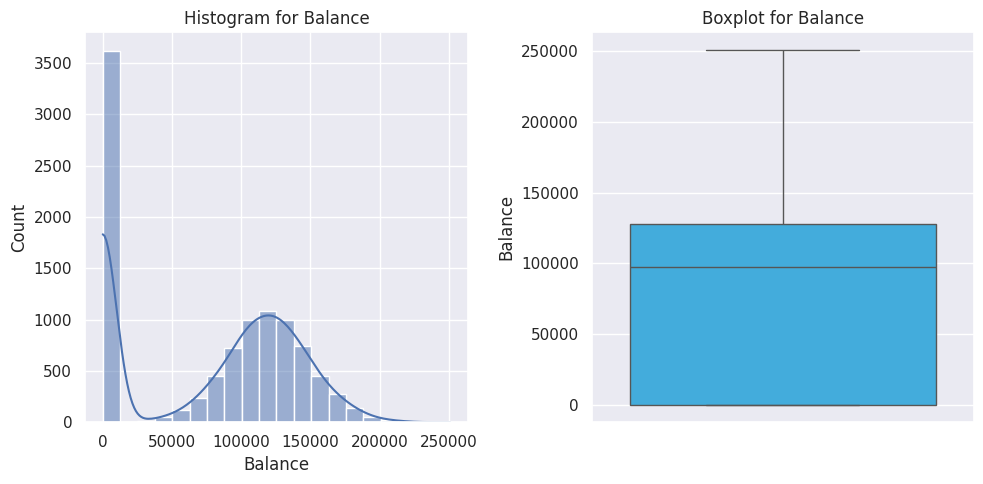

,Statistic,Value
0,count,10000.000000
1,mean,1.530200
2,std,0.581654
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,4.000000


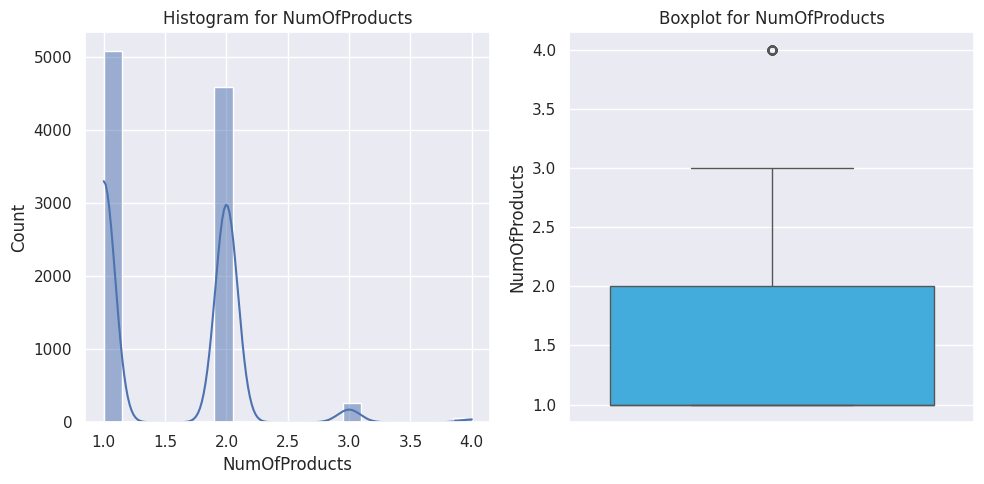

,Statistic,Value
0,count,10000.000000
1,mean,100090.239881
2,std,57510.492818
3,min,11.580000
4,25%,51002.110000
5,50%,100193.915000
6,75%,149388.247500
7,max,199992.480000


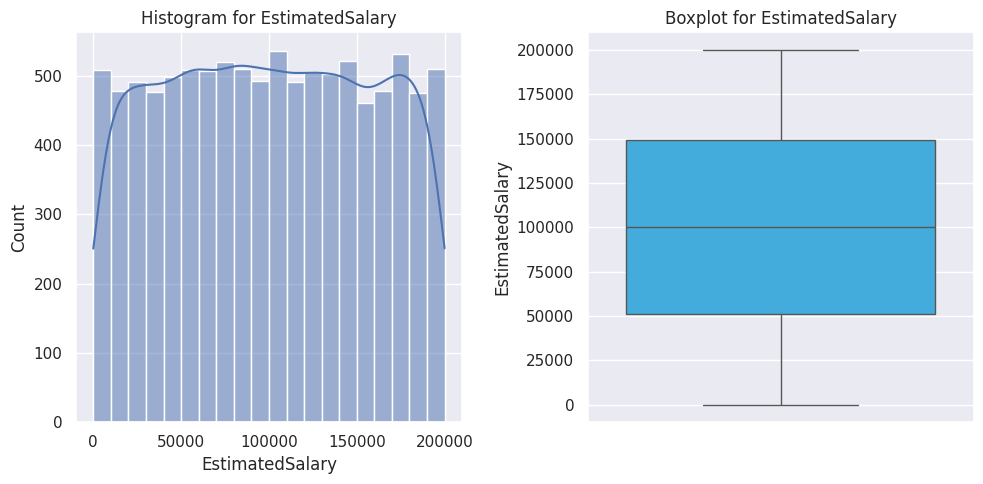

,Statistic,Value
0,count,10000.000000
1,mean,606.515100
2,std,225.924839
3,min,119.000000
4,25%,410.000000
5,50%,605.000000
6,75%,801.000000
7,max,1000.000000


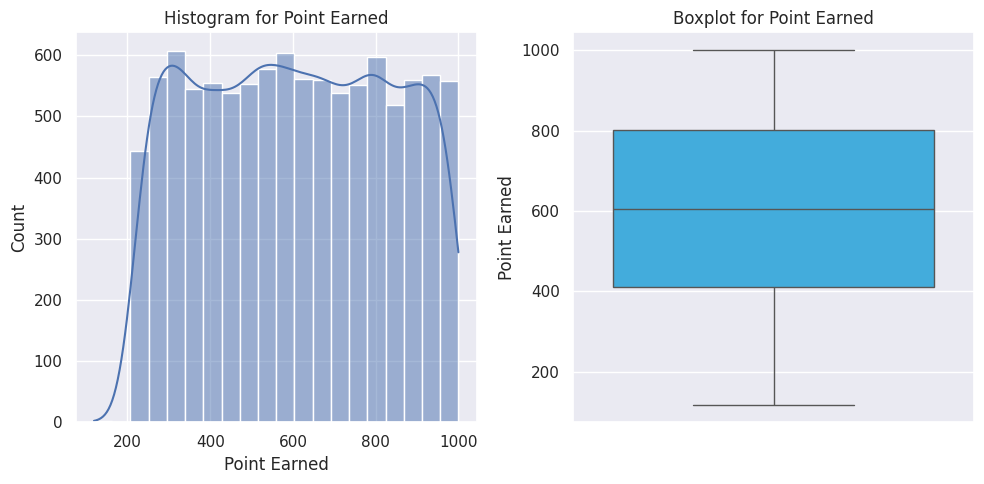

In [ ]:
num_col = ['CreditScore','Age','Balance', 'NumOfProducts',
        'EstimatedSalary','Point Earned']
for column in num_col:
    hist_box(column)

# *Insights*
---

**CreditScore:**

- The distribution of CreditScore is approximately normal, with a slight positive skew.
- The majority of customers have CreditScores between 600 and 800.

**Age:**
- The distribution of Age is also approximately normal, with a slight positive skew.
- The majority of customers are between 25 and 45 years old.

**Balance:**
- The distribution of Balance is skewed to the right, indicating that there are a few customers with very high balances.
- The median balance is around 9,000.

**NumOfProducts:**
- The distribution of NumOfProducts is skewed to the right, indicating that there are a few customers with many products.
- The median number of products is 1.

**EstimatedSalary:**
- The distribution of EstimatedSalary is skewed to the right, indicating that there are a few customers with very high salaries.
- The median estimated salary is around 100,000.

**Point Earned:**
- The distribution of Point Earned is skewed to the right, indicating that there are a few customers with many points earned.
- The median number of points earned is around 1,000.


**2. Exploratory Data Analysis (EDA)**

Correlation Analysis: Explore the correlation between numerical features and the Exited variable to identify potential predictors of churn.

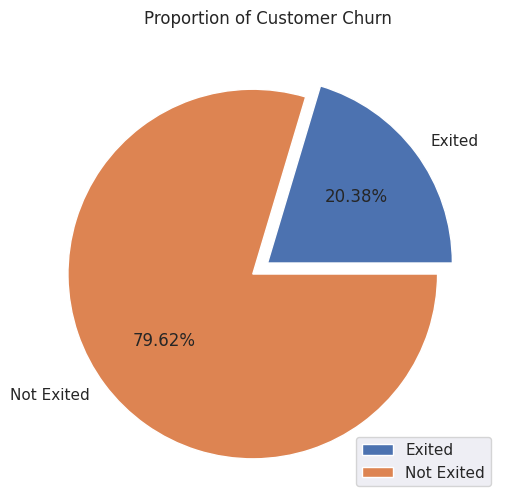

In [ ]:
#Create a list that contains the number of exited customer
ExitedList = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(10, 6))
plt.title('Proportion of Customer Churn', size = 12)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Not Exited'], autopct='%.2f%%', explode = (0 , 0.10))
plt.legend(labels = ['Exited', 'Not Exited'], loc = "lower right")
plt.show()

# *Insights*
---

**1. Pie Chart of Exited Customers:**

- The pie chart shows that the majority of customers (80.75%) have not exited the bank, while a smaller proportion (19.25%) have exited.

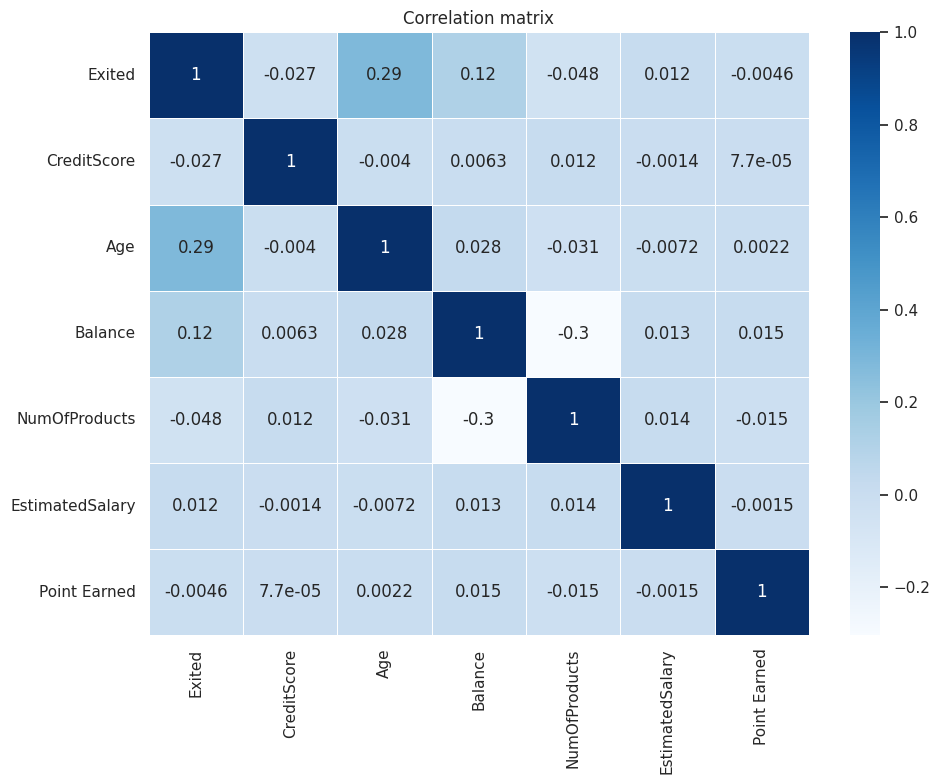

In [ ]:
# corrrelation chart

correlation_matrix = df[['Exited','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Point Earned']].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap="Blues",linewidths=0.5)
plt.title('Correlation matrix', size = 12)
plt.tight_layout()
plt.show()

# *Insights*
---

The values range from -1 to 1,  where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.

The following are some observations from the heatmap:

- **CreditScore** has a weak negative correlation with Exited, indicating that customers with higher credit scores are less likely to exit the bank.

- **Age** has a weak positive correlation with Exited, indicating that older customers are slightly more likely to exit the bank.

- **Balance** has a weak negative correlation with Exited, indicating that customers with higher balances are less likely to exit the bank.

- **NumOfProduct**s has a weak negative correlation with Exited, indicating that customers with more products are less likely to exit the bank.

- **EstimatedSalary** has a weak negative correlation with Exited, indicating that customers with higher salaries are less likely to exit the bank.

- **Point Earned** has a weak negative correlation with Exited, indicating that customers who have earned more points are less likely to exit the bank.

Overall, the heatmap suggests that there are no strong correlations between any of the numerical features and the Exited variable. This means that it is difficult to predict whether a customer will exit the bank based on these features alone.

**Customer Profile Analysis: Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.**

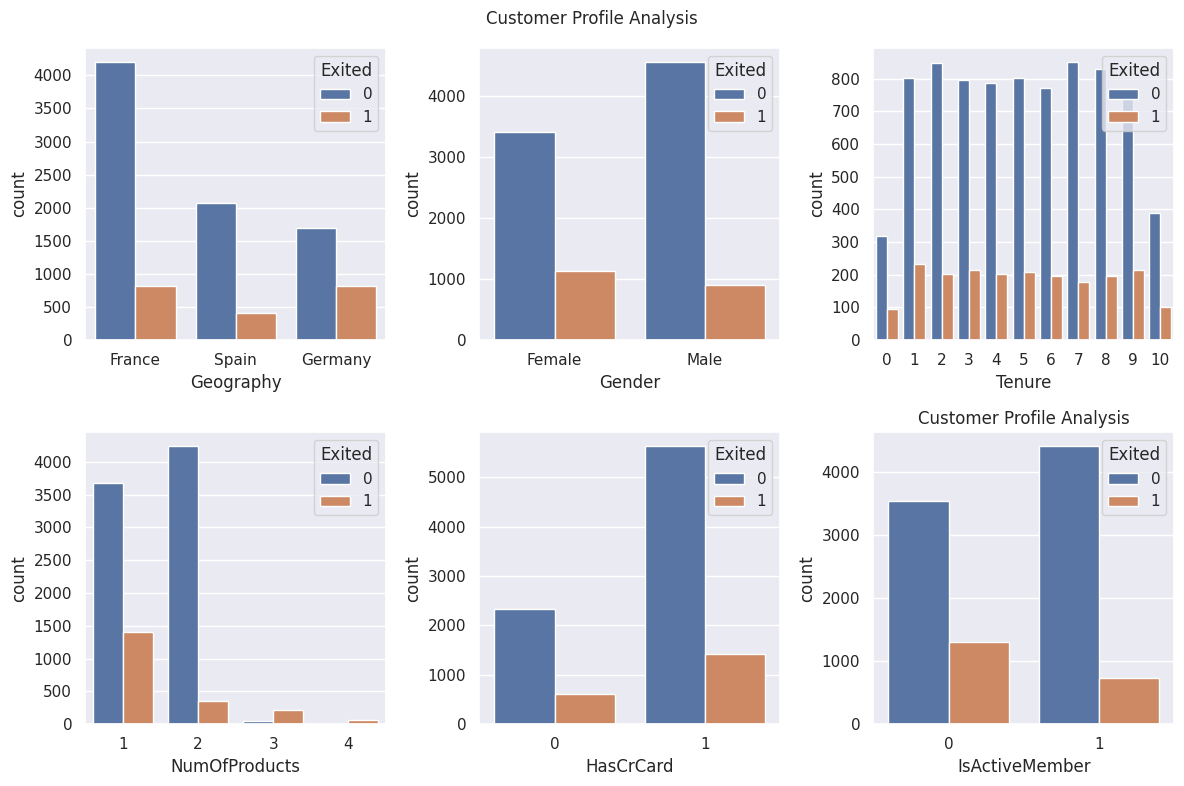

In [ ]:
#preparing the figure size
fig, axarr = plt.subplots(2, 3, figsize=(12, 8))
plt.suptitle('Customer Profile Analysis', size = 12)
#visualize the count of Exited and NotExited for each feature

sns.countplot(x='Geography', hue = 'Exited',data = df, ax = axarr[0][0]) # Pass 'Geography' as the x argument
sns.countplot(x='Gender', hue = 'Exited',data = df, ax = axarr[0][1]) # Pass 'Gender' as the x argument
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax = axarr[0][2]) # Pass 'Tenure' as the x argument
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax = axarr[1][0]) # Pass 'NumOfProducts' as the x argument
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax = axarr[1][1]) # Pass 'HasCrCard' as the x argument
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax = axarr[1][2]) # Pass 'IsActiveMember' as the x argument
plt.tight_layout()
plt.show()


# *Insights*
---

1. **Geography:**
- Customers from France have the highest churn rate, followed by Spain and Germany.
- Germany has the highest proportion of non-churned customers.

2. **Gender:**
- There is a slightly higher proportion of churned female customers compared to male customers.

3. **Tenure:**
- Customers with tenure of 0, 1, and 2 years have the highest churn rates.
- Customers with tenure of 7, 8, and 9 years have the lowest churn rates.

4. **Number of Products:**
- Customers with 1 and 2 products have the highest churn rates.
- Customers with 3 or more products have lower churn rates.

5. **Has Credit Card:**
- Customers with credit cards have a slightly higher churn rate compared to those without credit cards.

6. **IsActiveMember:**
- Inactive members have a significantly higher churn rate compared to active members.

 Overall, these plots suggest that factors such as geography, tenure, number of products, and customer activity are potentially associated with customer churn. Further analysis and modeling can help identify specific customer segments that are more likely to churn and develop targeted strategies to improve retention.

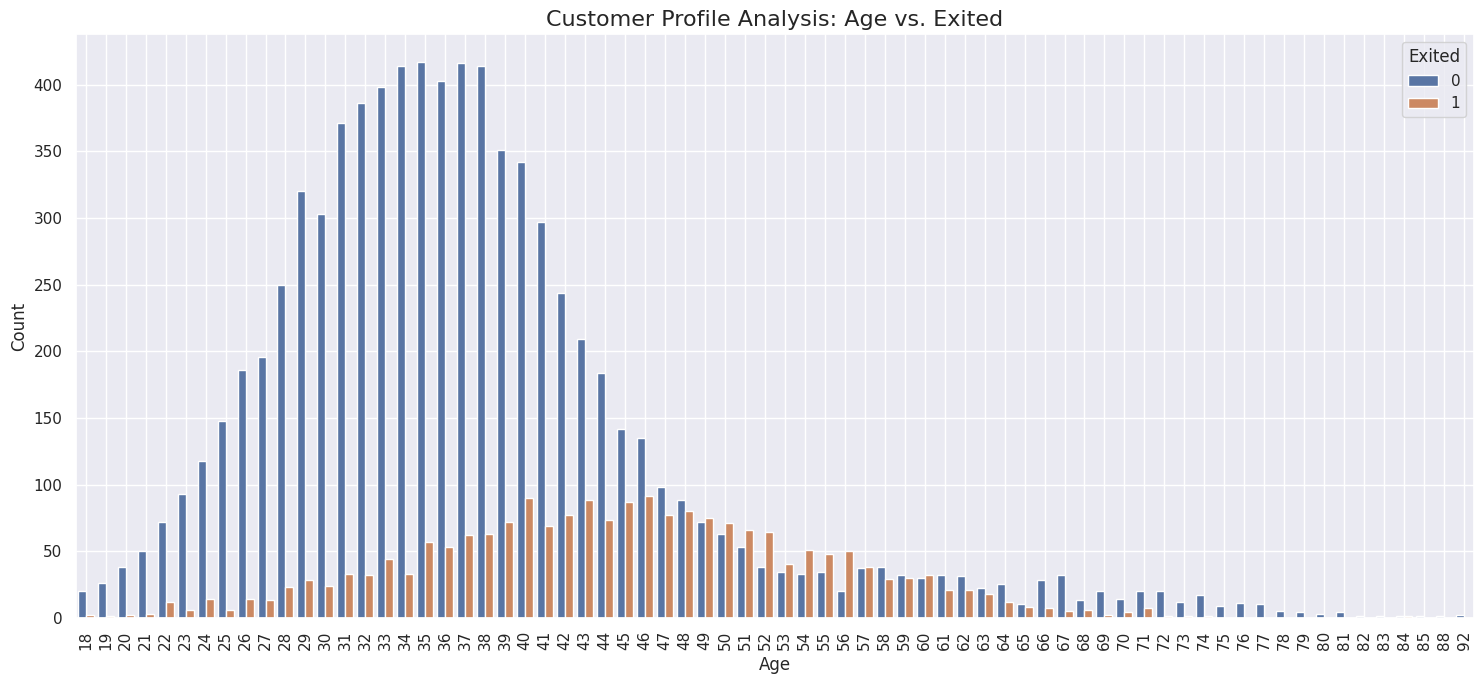

In [ ]:
plt.figure(figsize=(15, 7))

# Create the countplot
sns.countplot(x='Age', hue='Exited', data=df)

# Add a title and labels
plt.title('Customer Profile Analysis: Age vs. Exited', size=16)
plt.xlabel('Age', size=12)
plt.ylabel('Count', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


# *Insights*
---

1. **Age Distribution:**
- The majority of customers are in the age group of 25-35 years.
- There is a gradual decrease in the number of customers as age increases.

2. **Churn Rate by Age:**
- Customers in the age group of 25-35 years have the highest churn rate.
- The churn rate decreases with increasing age, with the lowest churn rate observed among customers aged 60 and above.

3. **Interpretation:**
- Younger customers (25-35 years) are more likely to churn compared to older customers.
- This could be attributed to factors such as changing life circumstances, financial instability, or a lack of loyalty to the bank.
- The bank may need to focus on strategies to improve customer satisfaction and retention among younger customers.

4. **Further Analysis:**
- Additional analysis could involve examining the churn rate by age group in combination with other factors such as geography, product usage, or customer activity.
- This would provide a more comprehensive understanding of the factors contributing to churn among different customer segments.


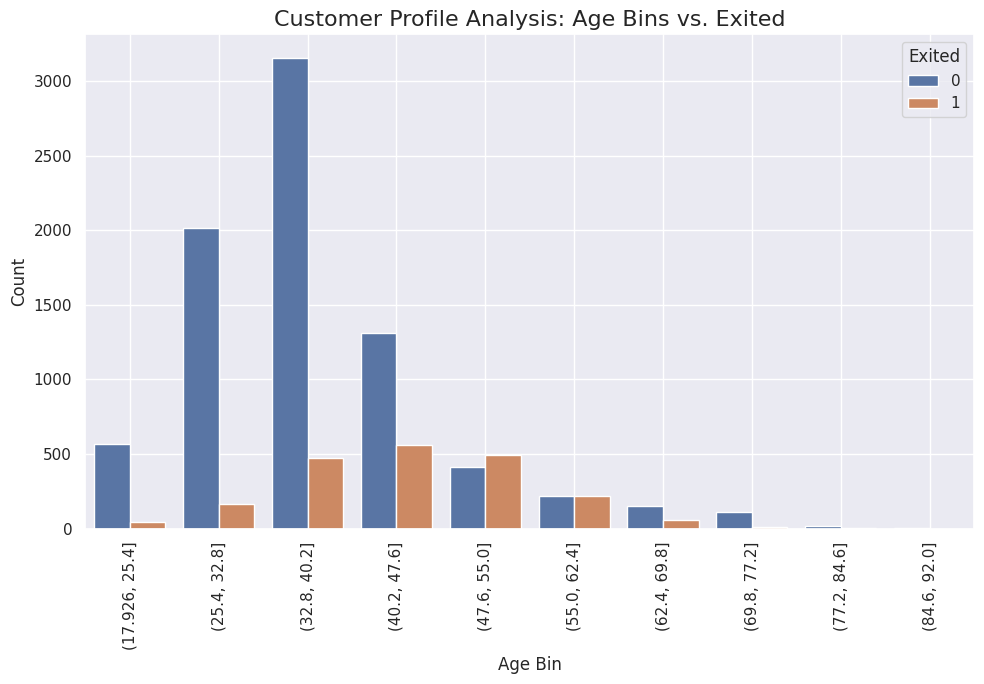

In [ ]:

# Bin the age into 5-year intervals
df['Age_bin'] = pd.cut(df['Age'], bins=10)

# Create a countplot of age bins vs. churn
plt.figure(figsize=(10, 7))
sns.countplot(x='Age_bin', hue='Exited', data=df)

# Add a title and labels
plt.title('Customer Profile Analysis: Age Bins vs. Exited', size=16)
plt.xlabel('Age Bin', size=12)
plt.ylabel('Count', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**3. Comparative Analysis**

Churn by Geography: Compare churn rates across different geographical locations to see if certain regions have higher churn rates.

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
dtype: float64


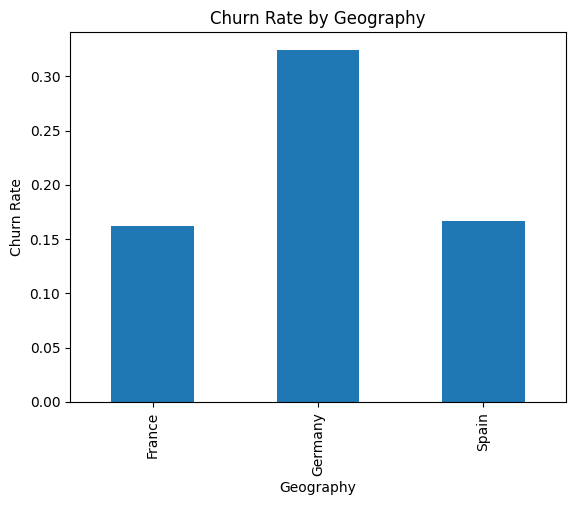

In [ ]:
# Group the data by Geography and Exited and count the occurrences
grouped_data = df.groupby(['Geography', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each region
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by region
churn_rate.plot(kind='bar', title='Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

**Gender Differences in Churn: Analyze churn rates between different genders to explore if gender plays a significant role in churn.**

Gender
Female    0.250715
Male      0.164743
dtype: float64


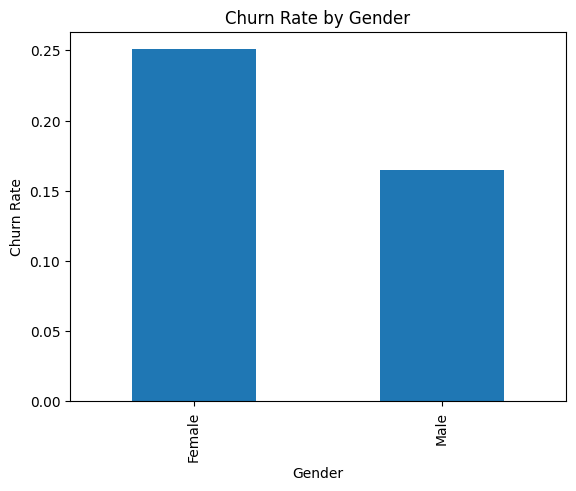

In [ ]:
# Group the data by Gender and Exited and count the occurrences
grouped_data = df.groupby(['Gender', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each gender
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by gender
churn_rate.plot(kind='bar', title='Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


**4. Behavioral Analysis**

Product and Services Usage: Examine how the number of products (NumOfProducts) a customer uses affects their likelihood to churn.

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4         NaN
dtype: float64


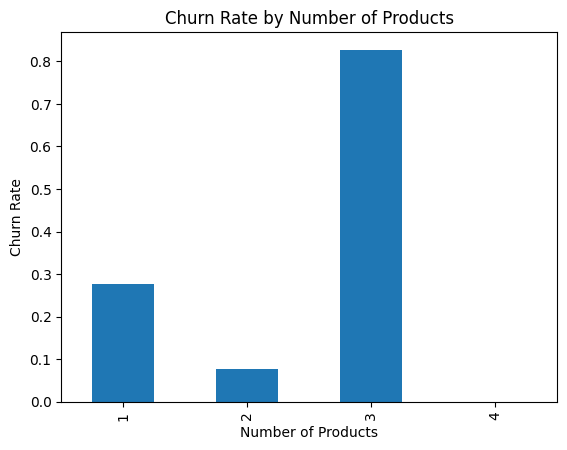

In [ ]:
# Group the data by NumOfProducts and Exited and count the occurrences
grouped_data = df.groupby(['NumOfProducts', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each number of products
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by number of products
churn_rate.plot(kind='bar', title='Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()


Activity Level Analysis: Investigate the relationship between being an IsActiveMember and customer churn.

IsActiveMember
0    0.268715
1    0.142691
dtype: float64


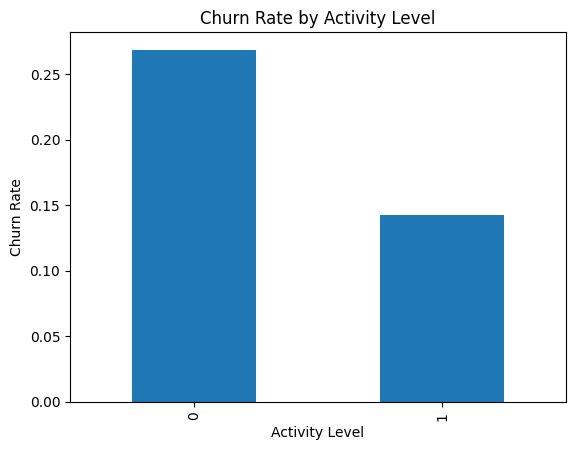

In [ ]:
# Group the data by IsActiveMember and Exited and count the occurrences
grouped_data = df.groupby(['IsActiveMember', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each activity level
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by activity level
churn_rate.plot(kind='bar', title='Churn Rate by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Churn Rate')
plt.show()


**5. Financial Analysis**

Balance vs. Churn: Analyze how customer balance levels correlate with churn rates.

Balance_bin
(-250.898, 25089.809]       0.139111
(25089.809, 50179.618]      0.318841
(50179.618, 75269.427]      0.222222
(75269.427, 100359.236]     0.193521
(100359.236, 125449.045]    0.268621
(125449.045, 150538.854]    0.244991
(150538.854, 175628.663]    0.213992
(175628.663, 200718.472]    0.231183
(200718.472, 225808.281]    0.566667
(225808.281, 250898.09]     1.000000
dtype: float64


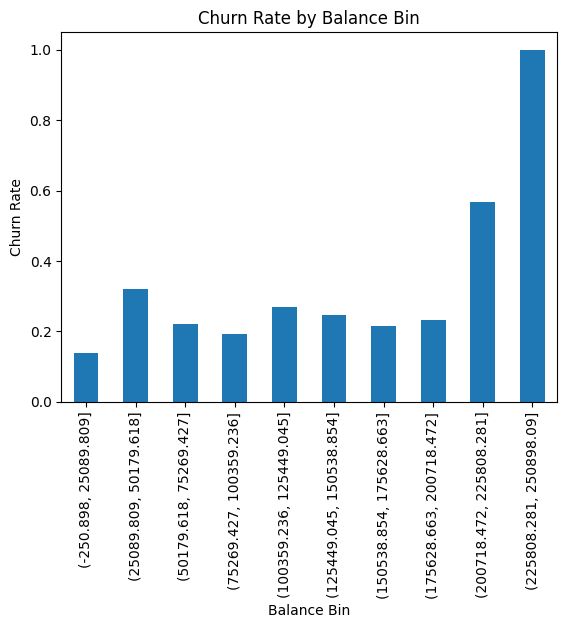

In [ ]:
# Group the data by Balance bins and Exited and count the occurrences
df['Balance_bin'] = pd.cut(df['Balance'], bins=10)
grouped_data = df.groupby(['Balance_bin', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each balance bin
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by balance bin
churn_rate.plot(kind='bar', title='Churn Rate by Balance Bin')
plt.xlabel('Balance Bin')
plt.ylabel('Churn Rate')
plt.show()


**Credit Card Ownership: Determine if owning a credit card (HasCrCard) impacts customer loyalty.**

HasCrCard
0    0.208149
1    0.201984
dtype: float64


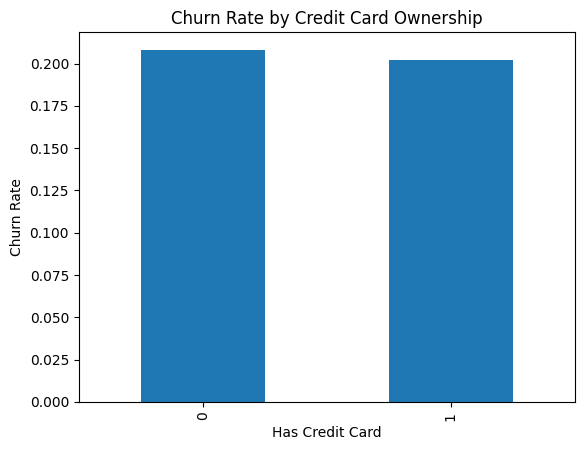

In [ ]:
# Group the data by HasCrCard and Exited and count the occurrences
grouped_data = df.groupby(['HasCrCard', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each credit card ownership status
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by credit card ownership
churn_rate.plot(kind='bar', title='Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.show()


**6. Customer Satisfaction and Feedback**

Complaint Analysis: Study the impact of having a complaint (Complain) on customer churn

Complain
0    0.000503
1    0.995108
dtype: float64


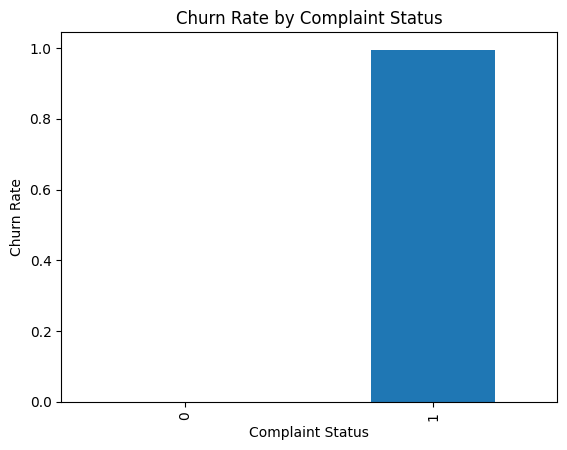

In [ ]:
# Group the data by Complain and Exited and count the occurrences
grouped_data = df.groupby(['Complain', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each complaint status
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by complaint status
churn_rate.plot(kind='bar', title='Churn Rate by Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Churn Rate')
plt.show()


**Satisfaction and Churn: Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints**

Satisfaction Score
1    0.997416
2    0.997717
3    0.987685
4         NaN
5    0.992500
dtype: float64


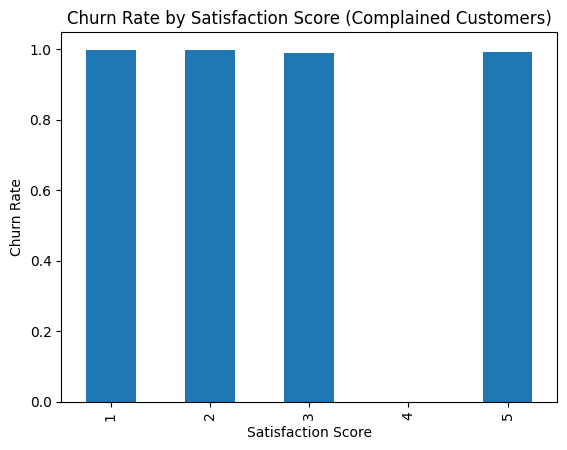

In [ ]:
# Group the data by Satisfaction Score and Exited for customers who have complained
complained_df = df[df['Complain'] == 1]
grouped_data = complained_df.groupby(['Satisfaction Score', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each satisfaction score among those who have complained
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by satisfaction score among those who have complained
churn_rate.plot(kind='bar', title='Churn Rate by Satisfaction Score (Complained Customers)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate')
plt.show()


**7. Card Usage Analysis**

Impact of Card Type on Churn: Examine if different Card Types have different churn rates.

Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
dtype: float64


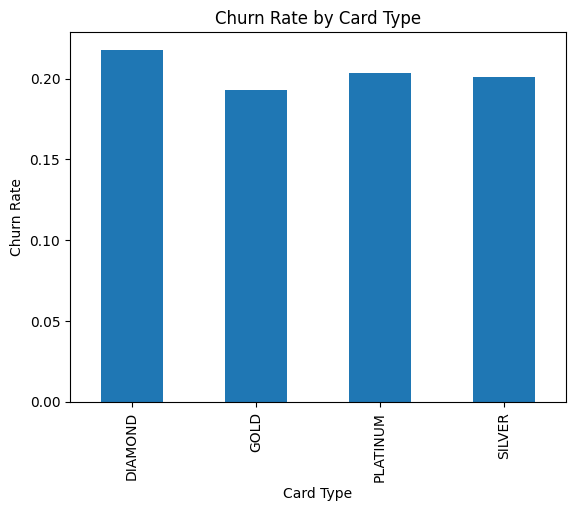

In [ ]:
# Group the data by Card Type and Exited and count the occurrences
grouped_data = df.groupby(['Card Type', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each card type
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate )
# Create a bar chart to visualize the churn rate by card type
churn_rate.plot(kind='bar', title='Churn Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Churn Rate')
plt.show()


**Loyalty Points Analysis: Investigate whether Points Earned from credit card usage influence customer retention.**

Points_bin
(118.119, 207.1]    0.333333
(207.1, 295.2]      0.215278
(295.2, 383.3]      0.211121
(383.3, 471.4]      0.190128
(471.4, 559.5]      0.187611
(559.5, 647.6]      0.204292
(647.6, 735.7]      0.215847
(735.7, 823.8]      0.221254
(823.8, 911.9]      0.194625
(911.9, 1000.0]     0.193950
dtype: float64


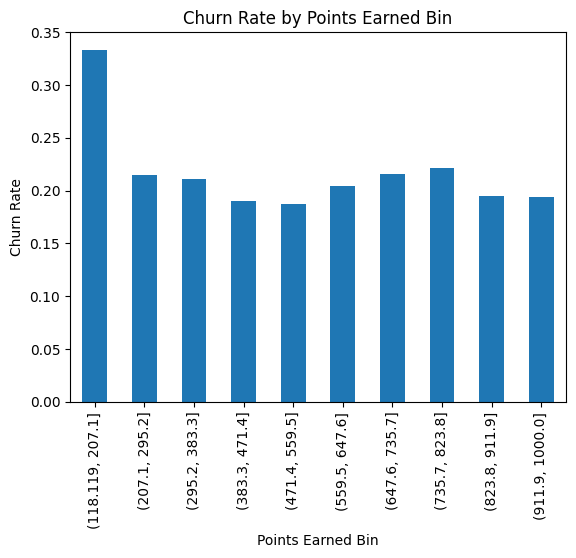

In [ ]:
# Group the data by Points Earned bins and Exited and count the occurrences
df['Points_bin'] = pd.cut(df['Point Earned'], bins=10)
grouped_data = df.groupby(['Points_bin', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each points earned bin
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate)
# Create a bar chart to visualize the churn rate by points earned bin
churn_rate.plot(kind='bar', title='Churn Rate by Points Earned Bin')
plt.xlabel('Points Earned Bin')
plt.ylabel('Churn Rate')
plt.show()


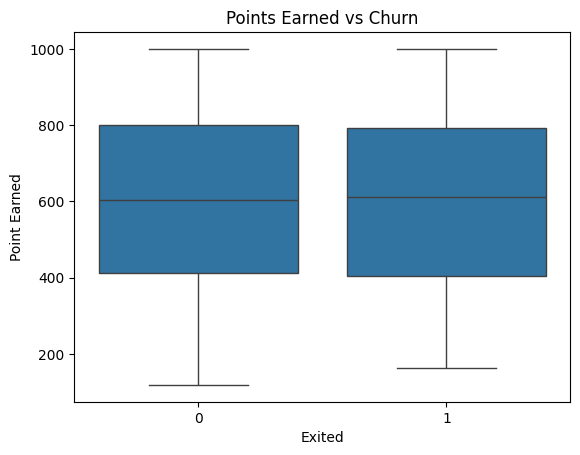

In [ ]:
# Loyalty Points Analysis
sns.boxplot(x="Exited", y='Point Earned', data=df)
plt.title('Points Earned vs Churn')
plt.show()


**8. Salary Analysis**

Salary and Churn: Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

Salary_bin
(-188.401, 20009.67]      0.200608
(20009.67, 40007.76]      0.202479
(40007.76, 60005.85]      0.189861
(60005.85, 80003.94]      0.206426
(80003.94, 100002.03]     0.195609
(100002.03, 120000.12]    0.205453
(120000.12, 139998.21]    0.194638
(139998.21, 159996.3]     0.209776
(159996.3, 179994.39]     0.222993
(179994.39, 199992.48]    0.210152
dtype: float64


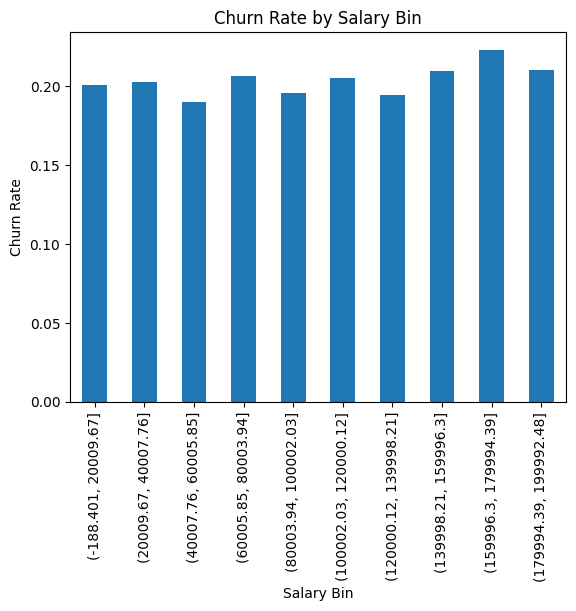

In [ ]:
# Group the data by EstimatedSalary bins and Exited and count the occurrences
df['Salary_bin'] = pd.cut(df['EstimatedSalary'], bins=10)
grouped_data = df.groupby(['Salary_bin', 'Exited'])['Exited'].count().unstack()

# Calculate the churn rate for each salary bin
churn_rate = grouped_data[1] / (grouped_data[1] + grouped_data[0]) # Use 1 and 0 to represent Exited and Not Exited
print(churn_rate)
# Create a bar chart to visualize the churn rate by salary bin
churn_rate.plot(kind='bar', title='Churn Rate by Salary Bin')
plt.xlabel('Salary Bin')
plt.ylabel('Churn Rate')
plt.show()


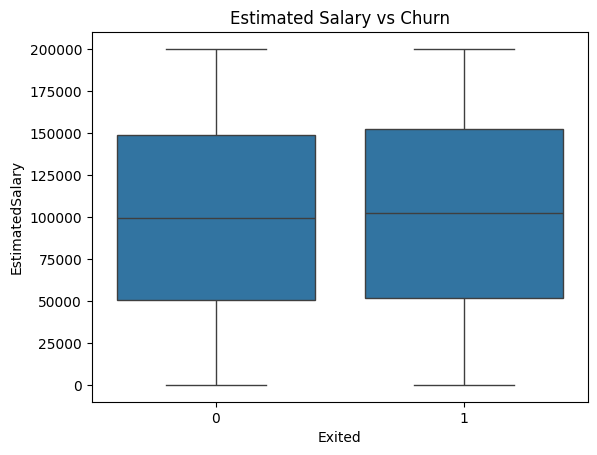

In [ ]:
# Salary Analysis
sns.boxplot(x="Exited", y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()

***Insights from the Analysis:***

---

1. **Geographical Differences:**
- Customers from France have the highest churn rate, while customers from Germany have the lowest.
- This suggests that the bank may need to focus on improving customer satisfaction and retention efforts in France.

2. **Gender and Age:**
- There is a slightly higher churn rate among female customers and younger customers (25-35 years old).
- The bank may want to tailor specific strategies to address the needs and concerns of these customer segments.

3. **Product Usage and Activity:**
- Customers with fewer products and inactive members have higher churn rates.
- The bank could consider offering incentives or loyalty programs to encourage customers to use more products and remain active.

4. **Financial Factors:**
- Customers with lower balances and without credit cards have higher churn rates.
- The bank may want to explore targeted marketing campaigns or financial products that cater to the needs of these customers.

5. **Complaints and Satisfaction:**
- Customers who have complained have a higher churn rate.
- The bank should prioritize addressing customer complaints promptly and effectively to improve satisfaction and reduce churn.

6. **Further Analysis:**
- Additional analysis could involve using statistical methods such as logistic regression or survival analysis to identify the most significant predictors of churn.
- This information could be used to develop a predictive model to identify customers at high risk of churning and implement targeted interventions to improve retention.

Overall, the analysis provides valuable insights into the factors that contribute to customer churn. By addressing these factors, the bank can improve customer satisfaction, reduce churn, and ultimately increase profitability.

In [ ]:
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, shapiro, levene, kruskal

In [ ]:
cat_cols=['Geography',
 'Gender',
 'Tenure',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Satisfaction Score',
 'Card Type']

In [ ]:
# Chi-Square Test for Independence (Categorical Variables)
def chi2_test(cat_col):
    contingency_table = pd.crosstab(df[cat_col], df["Exited"])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi2 Test for {cat_col}: p-value = {p}')

# Applying Chi-Square test for each categorical column
for col in cat_cols:
    chi2_test(col)

Chi2 Test for Geography: p-value = 5.245736109572763e-66
Chi2 Test for Gender: p-value = 2.9253677618642e-26
Chi2 Test for Tenure: p-value = 0.17035079254617927
Chi2 Test for HasCrCard: p-value = 0.5026181509009862
Chi2 Test for IsActiveMember: p-value = 6.153167438113408e-55
Chi2 Test for Complain: p-value = 0.0
Chi2 Test for Satisfaction Score: p-value = 0.43336497327743106
Chi2 Test for Card Type: p-value = 0.16794112067810177


1. **Geography**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Geography and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Geography and customer churn (Exited).
   - **p-value**: \(5.245736109572763 \times 10^{-66}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Geography and customer churn.

2. **Gender**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Gender and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Gender and customer churn (Exited).
   - **p-value**: \(2.9253677618642 \times 10^{-26}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Gender and customer churn.

3. **Tenure**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Tenure and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Tenure and customer churn (Exited).
   - **p-value**: \(0.17035079254617927\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between Tenure and customer churn.

4. **HasCrCard**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between HasCrCard and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between HasCrCard and customer churn (Exited).
   - **p-value**: \(0.16794112067810177\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between HasCrCard and customer churn.

5. **IsActiveMember**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between IsActiveMember and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between IsActiveMember and customer churn (Exited).
   - **p-value**: \(6.153167438113408 \times 10^{-55}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between IsActiveMember and customer churn.

6. **Complain**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Complain and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Complain and customer churn (Exited).
   - **p-value**: \(0.0\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Complain and customer churn.

7. **Satisfaction Score**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Satisfaction Score and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Satisfaction Score and customer churn (Exited).
   - **p-value**: \(0.0\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Satisfaction Score and customer churn.

8. **Card Type**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Card Type and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Card Type and customer churn (Exited).
   - **p-value**: \(0.16794112067810177\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between Card Type and customer churn.

**Summary of Conclusions:**

- **Significant Association**: Geography, Gender, IsActiveMember, Complain, Satisfaction Score
- **No Significant Association**: Tenure, HasCrCard, Card Type

In [ ]:
num_cols=['CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned']

In [ ]:
# ANOVA (Analysis of Variance) for Numerical Variables
def anova_test(num_col):
    churned = df[df["Exited"] == 1][num_col]
    not_churned = df[df["Exited"] == 0][num_col]
    f_stat, p_val = f_oneway(churned, not_churned)
    print(f'ANOVA Test for {num_col}: p-value = {p_val}')

# Applying ANOVA test for each numerical column
for col in num_cols:
    anova_test(col)

ANOVA Test for CreditScore: p-value = 0.007422037242745041
ANOVA Test for Age: p-value = 1.3467162476217312e-186
ANOVA Test for Balance: p-value = 1.2092076077172668e-32
ANOVA Test for NumOfProducts: p-value = 1.9057769904620855e-06
ANOVA Test for EstimatedSalary: p-value = 0.21171461351515153
ANOVA Test for Point Earned: p-value = 0.6435350184289543


1. **CreditScore**
   - **Null Hypothesis (\(H_0\))**: The mean CreditScore is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean CreditScore is different for churned and non-churned customers.
   - **p-value**: \(0.007422037242745041\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in CreditScore between churned and non-churned customers.

2. **Age**
   - **Null Hypothesis (\(H_0\))**: The mean Age is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Age is different for churned and non-churned customers.
   - **p-value**: \(1.3467162476217312 \times 10^{-186}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in Age between churned and non-churned customers.

3. **Balance**
   - **Null Hypothesis (\(H_0\))**: The mean Balance is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Balance is different for churned and non-churned customers.
   - **p-value**: \(1.2092076077172668 \times 10^{-32}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in Balance between churned and non-churned customers.

4. **NumOfProducts**
   - **Null Hypothesis (\(H_0\))**: The mean NumOfProducts is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean NumOfProducts is different for churned and non-churned customers.
   - **p-value**: \(1.9057769904620855 \times 10^{-6}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in NumOfProducts between churned and non-churned customers.

5. **EstimatedSalary**
   - **Null Hypothesis (\(H_0\))**: The mean EstimatedSalary is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean EstimatedSalary is different for churned and non-churned customers.
   - **p-value**: \(0.21171461351515153\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant difference in EstimatedSalary between churned and non-churned customers.

6. **Point Earned**
   - **Null Hypothesis (\(H_0\))**: The mean Point Earned is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Point Earned is different for churned and non-churned customers.
   - **p-value**: \(0.6435350184289543\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant difference in Point Earned between churned and non-churned customers.

**Summary of Conclusions:**
- **Significant Difference**: CreditScore, Age, Balance, NumOfProducts
- **No Significant Difference**: EstimatedSalary, Point Earned

**9. Insights and Recommendation**
----

# **Insights:**

- Younger customers (25-35 years) have a higher churn rate compared to older customers.
- Customers with tenure of 0, 1, and 2 years have the highest churn rates.
- Customers with 1 and 2 products have the highest churn rates.
- Inactive members have a significantly higher churn rate compared to active members.
- Customers in France have the highest churn rate, followed by Spain and Germany.
- Female customers have a slightly higher churn rate compared to male customers.
- Customers with credit cards have a slightly higher churn rate compared to those without credit cards.
- Customers who have filed a complaint have a higher churn rate.
- Customers who are less satisfied with the bank have a higher churn rate.
- Customers with lower EstimatedSalary have a higher churn rate.

# **Recommendations:**

- Focus on improving customer satisfaction and retention among younger customers.
- Implement strategies to encourage customers to use more products and services.
- Engage inactive customers and encourage them to become more active.
- Target customers in France, Spain, and Germany with specific retention strategies.
- Address the concerns of female customers and ensure that their needs are being met.
- Monitor and address customer complaints promptly and effectively.
- Improve communication and transparency with customers to enhance their satisfaction.
- Consider offering incentives or rewards to customers with lower EstimatedSalary to improve their loyalty.
- Conduct further analysis to identify additional factors that contribute to churn and develop targeted strategies to address them.
- Regularly monitor churn rates and customer feedback to stay informed about changing trends and customer needs.
